[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



(a) Hair color;
(b) Height;
(c) Number of people in a class;
(d) Distance of a football throw;

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")

Part a. Construct a histogram of CO2 emissions.

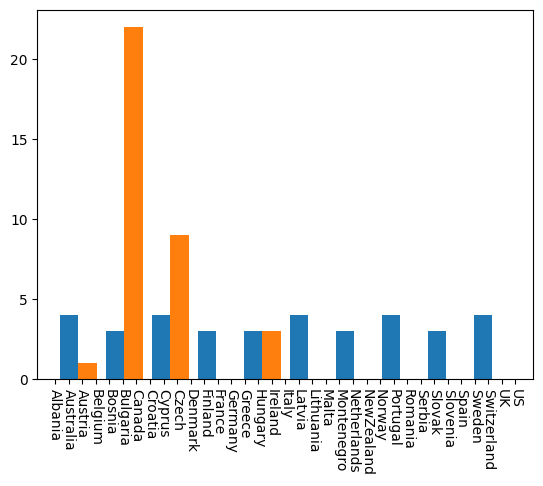

In [2]:
plt.hist(carbon_west)
plt.tick_params(axis='x', labelrotation=270)

Part b. Find the mean, median, and standard deviation.

In [3]:
CO2_mean = carbon_west["CO2"].mean()
CO2_median = carbon_west["CO2"].median()
CO2_sd = carbon_west["CO2"].std()
print(f"mean:  {CO2_mean}")
print(f"median:  {CO2_median}")
print(f"standard deviation: {CO2_sd}")

mean:  6.717142857142858
median:  5.9
standard deviation: 3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [4]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [5]:
murders_wo_dc = murders[murders["state"] != "DC"]

murder_mean = murders_wo_dc["murder"].mean()
murder_sd = murders_wo_dc["murder"].std()
print(f"mean: {murder_mean}")
print(f"standard deviation: {murder_sd}")

mean: 4.874
standard deviation: 2.586291174793806


Part b. Find the five-number  summary without D.C.

In [6]:
min = np.min(murders_wo_dc["murder"])
q1 = np.percentile(murders_wo_dc["murder"], 25)
med = np.median(murders_wo_dc["murder"])
q3 = np.percentile(murders_wo_dc["murder"], 75)
max = np.max(murders_wo_dc["murder"])

print (f"min: {min}")
print (f"q1: {q1}")
print (f"med: {med}")
print (f"q3: {q3}")
print (f"max: {max}")

min: 1.0
q1: 2.625
med: 4.85
q3: 6.175
max: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [7]:
min = np.min(murders["murder"])
q1 = np.percentile(murders["murder"], 25)
med = np.median(murders["murder"])
q3 = np.percentile(murders["murder"], 75)
max = np.max(murders["murder"])

print (f"min: {min}")
print (f"q1: {q1}")
print (f"med: {med}")
print (f"q3: {q3}")
print (f"max: {max}")

min: 1.0
q1: 2.6500000000000004
med: 5.0
q3: 6.45
max: 24.2


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [8]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

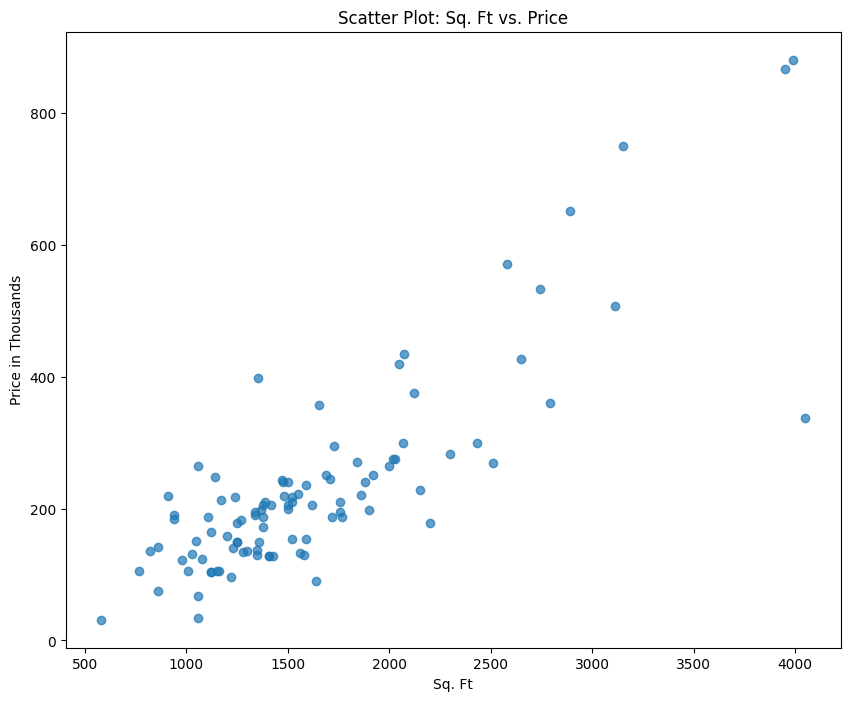

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(houses['size'], houses['price'], alpha=0.7)
plt.title('Scatter Plot: Sq. Ft vs. Price')
plt.xlabel('Sq. Ft')
plt.ylabel('Price in Thousands')

plt.show()

Part b. Find the correlation between the two variables.

In [10]:
correlation = houses['size'].corr(houses['price'])
print(f'Correlation tween size and price: {correlation}')

Correlation tween size and price: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

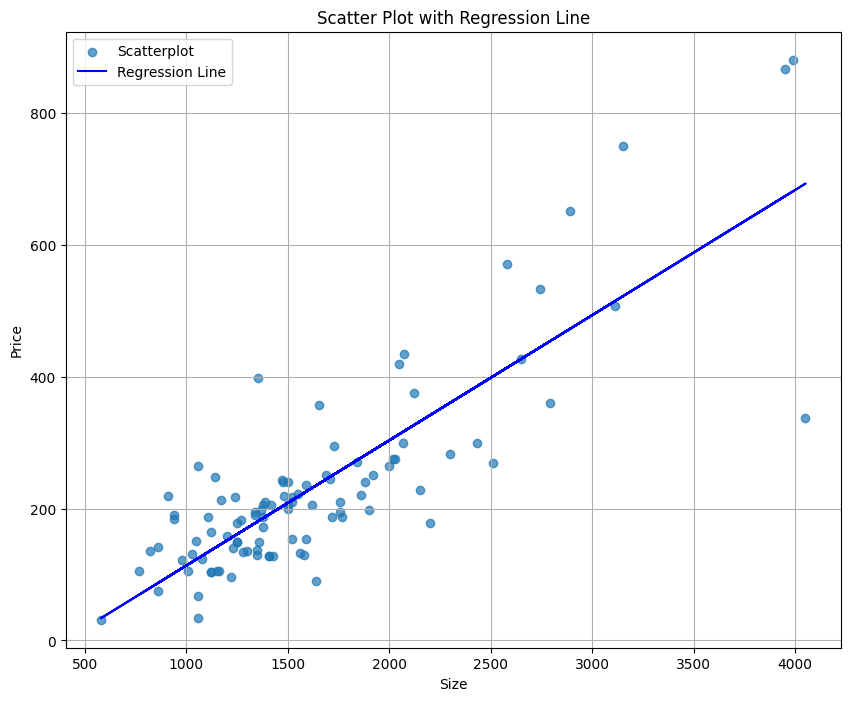

In [11]:
x = houses[['size']]
y = houses['price']

plt.figure(figsize=(10, 8))
plt.scatter(x, y, alpha=0.7, label='Scatterplot')

model = LinearRegression()
model.fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_
plt.plot(x, model.predict(x), color='blue', label='Regression Line') #its game day

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 1000x800 with 0 Axes>

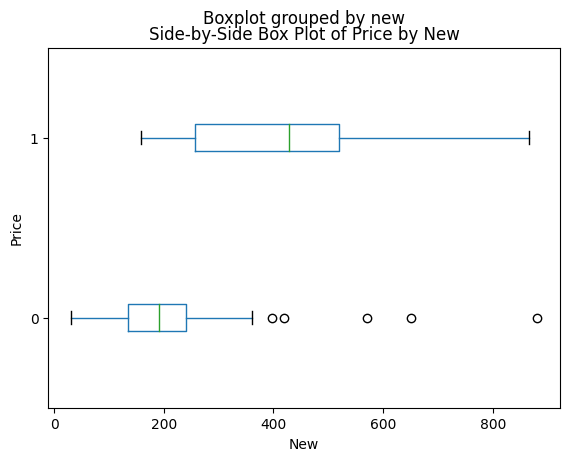

In [12]:
plt.figure(figsize=(10, 8))
houses.boxplot(column='price', by='new', vert=False,grid = False)
plt.title('Side-by-Side Box Plot of Price by New')
plt.xlabel('New')
plt.ylabel('Price')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [13]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [14]:
pd.crosstab(happy["happiness"], happy["marital"])

marital,fe,fem,mal,male
happiness,,,,
1,348,0,0,0
1 1,0,5,107,99
1 2,0,0,33,0
1 3,0,0,56,0
2,642,0,0,0
2 1,0,0,229,0
2 2,0,0,114,0
2 3,0,0,210,0
3,153,0,0,0
